## Welcome to your notebook.


In [2]:
sg_dataset = '/arcgis/singapore.csv'

In [3]:
hk_dataset = '/arcgis/hong_kong.csv'

#### Run this cell to connect to your GIS and get started:

In [4]:
from arcgis.gis import GIS
gis = GIS("home")

/opt/conda/lib/python3.9/site-packages/arcgis/gis/__init__.py:703: UserWarning: You are logged on as argysakti with an administrator role, proceed with caution.
  warnings.warn(


#### Now you are ready to start!

In [5]:
import pandas as pd
sg_df = pd.read_csv(sg_dataset)
hk_df = pd.read_csv(hk_dataset)


# Assuming you have two DataFrames: df1 and df2, with the same columns
combined_df = pd.concat([sg_df, hk_df], ignore_index=True)
combined_df

,h3,total_area,weighted_median_income,population,poi_count,bus_st_count,subway_st_count,public_transport_stations
0,886520c12dfffff,757980.495632,91.512028,744.0,0.0,1.0,0.0,1.0
1,886520c165fffff,272415.451272,3500.000000,2406.0,0.0,0.0,0.0,0.0
2,886520c167fffff,183884.378843,2614.853374,1635.0,0.0,0.0,0.0,0.0
3,886520c859fffff,834589.851872,9.143456,6.0,0.0,1.0,0.0,1.0
4,886520c969fffff,651028.857921,586.940948,310.0,0.0,2.0,0.0,2.0
...,...,...,...,...,...,...,...,...
1817,88411cbb63fffff,0.000029,20000.000000,1096.0,5.0,4.0,0.0,4.0
1818,88411cbb65fffff,0.000028,20000.000000,591.0,3.0,4.0,0.0,4.0
1819,88411cbb67fffff,0.000054,20000.000000,552.0,3.0,6.0,0.0,6.0
1820,88411cbb69fffff,0.000005,20000.000000,12.0,0.0,0.0,0.0,0.0


## Model Analysis

In [6]:
combined_df.describe()

,total_area,weighted_median_income,population,poi_count,bus_st_count,subway_st_count,public_transport_stations
count,1.822000e+03,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000,1822.000000
mean,2.246630e+05,18073.121231,17811.575192,24.198134,4.785401,0.442371,9.631714
std,3.633490e+05,12631.426735,35697.474299,66.188113,6.787554,0.959203,15.458350
min,2.305974e-08,0.073853,1.000000,0.000000,0.000000,0.000000,0.000000
25%,5.766309e-05,4500.000000,112.000000,1.000000,0.000000,0.000000,0.000000
50%,6.295312e-05,19022.174863,1884.000000,5.000000,1.000000,0.000000,2.000000
75%,7.759955e+05,22870.038487,17911.500000,18.000000,8.000000,1.000000,14.002347
max,8.346752e+05,80000.000000,265400.000000,1048.000000,48.000000,8.000000,125.189125


In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = combined_df[['weighted_median_income', 'population', 'poi_count', 'public_transport_stations']].corr()
print(correlation_matrix)

                           weighted_median_income  population  poi_count  \
weighted_median_income                   1.000000   -0.044162  -0.105569   
population                              -0.044162    1.000000   0.428936   
poi_count                               -0.105569    0.428936   1.000000   
public_transport_stations               -0.221725    0.634982   0.608998   

                           public_transport_stations  
weighted_median_income                     -0.221725  
population                                  0.634982  
poi_count                                   0.608998  
public_transport_stations                   1.000000  


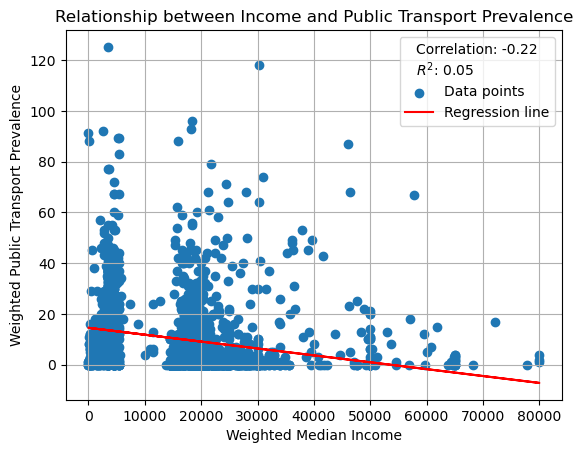

In [52]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' is your DataFrame
X = combined_df[['weighted_median_income']]  # Predictor variable
y = combined_df['public_transport_stations']  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the regression line
y_pred = model.predict(X)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_df['weighted_median_income'], combined_df['public_transport_stations'])[0, 1]
r_squared = model.score(X, y)

# Scatter plot
plt.scatter(X, y, label='Data points')

# Regression line
plt.plot(X, y_pred, color='red', label=f'Regression line')

# Legend with correlation coefficient and R^2
plt.legend(title=f'Correlation: {correlation_coefficient:.2f}\n$R^2$: {r_squared:.2f}')

plt.title('Relationship between Income and Public Transport Prevalence')
plt.xlabel('Weighted Median Income')
plt.ylabel('Weighted Public Transport Prevalence')
plt.grid(True)
plt.show()


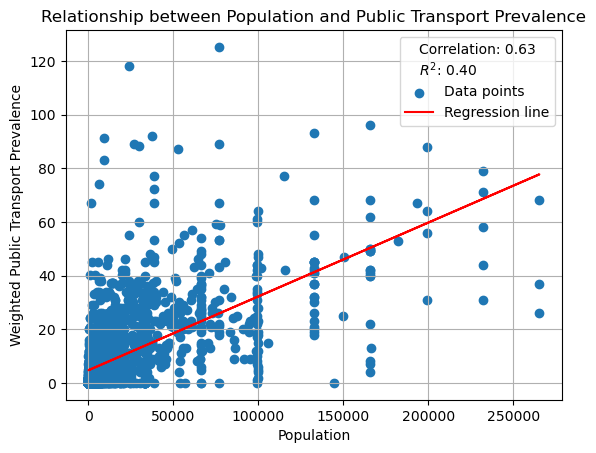

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' is your DataFrame
X = combined_df[['population']]  # Predictor variable
y = combined_df['public_transport_stations']  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the regression line
y_pred = model.predict(X)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_df['population'], combined_df['public_transport_stations'])[0, 1]
r_squared = model.score(X, y)

# Scatter plot
plt.scatter(X, y, label='Data points')

# Regression line
plt.plot(X, y_pred, color='red', label=f'Regression line')

# Legend with correlation coefficient and R^2
plt.legend(title=f'Correlation: {correlation_coefficient:.2f}\n$R^2$: {r_squared:.2f}')

plt.title('Relationship between Population and Public Transport Prevalence')
plt.xlabel('Population')
plt.ylabel('Weighted Public Transport Prevalence')
plt.grid(True)
plt.show()


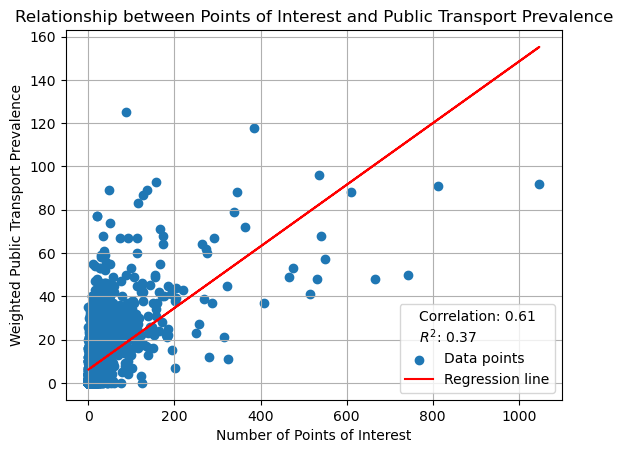

In [51]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Assuming 'df' is your DataFrame
X = combined_df[['poi_count']]  # Predictor variable
y = combined_df['public_transport_stations']  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the regression line
y_pred = model.predict(X)

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(combined_df['poi_count'], combined_df['public_transport_stations'])[0, 1]
r_squared = model.score(X, y)

# Scatter plot
plt.scatter(X, y, label='Data points')

# Regression line
plt.plot(X, y_pred, color='red', label=f'Regression line')

# Legend with correlation coefficient and R^2
plt.legend(title=f'Correlation: {correlation_coefficient:.2f}\n$R^2$: {r_squared:.2f}')

plt.title('Relationship between Points of Interest and Public Transport Prevalence')
plt.xlabel('Number of Points of Interest')
plt.ylabel('Weighted Public Transport Prevalence')
plt.grid(True)
plt.show()


Coefficients: [0.00019803 0.09634633]
Intercept: 3.749203169937566
Mean Squared Error: 119.38
R2 Score: 0.51


/tmp/ipykernel_126/1400637462.py:36: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


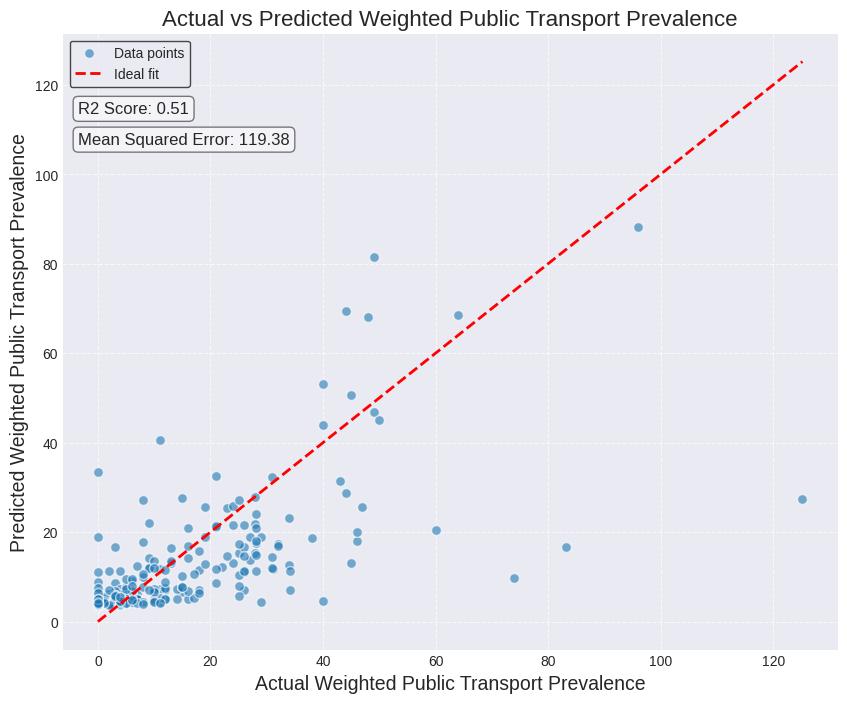

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'combined_df' is your DataFrame with 'population', 'poi_count', and 'public_transport_stations' columns
# Splitting the dataset into training and testing sets
X = combined_df[['population', 'poi_count']]
y = combined_df['public_transport_stations']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a linear regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Predicting on the testing set
y_pred = regressor.predict(X_test)

# Printing the coefficients and intercept
print(f"Coefficients: {regressor.coef_}")
print(f"Intercept: {regressor.intercept_}")

# Calculating the performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Printing the performance metrics
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Ensure that fonts are large enough to read and the plot is a good size
plt.figure(figsize=(10, 8))

# Use a consistent and appealing style
plt.style.use('seaborn-darkgrid')

# Scatter plot with appropriate marker size and edgecolor for better visibility
plt.scatter(y_test, y_pred, label='Data points', alpha=0.6, edgecolors='w', s=50)

# Ideal fit line with clear color
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Ideal fit', linewidth=2)

# Legend with semi-transparent background
legend = plt.legend(frameon=True)
legend.get_frame().set_alpha(0.7)
legend.get_frame().set_edgecolor('black')

# Annotations with buffer space from the edge, larger font size, and a background color for readability
plt.text(0.02, 0.89, f'R2 Score: {r2:.2f}', fontsize=12, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))
plt.text(0.02, 0.84, f'Mean Squared Error: {mse:.2f}', fontsize=12, transform=plt.gca().transAxes,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

# Axis labels and title with increased font size for better readability
plt.xlabel("Actual Weighted Public Transport Prevalence", fontsize=14)
plt.ylabel("Predicted Weighted Public Transport Prevalence", fontsize=14)
plt.title("Actual vs Predicted Weighted Public Transport Prevalence", fontsize=16)

# Display the grid lines as a background to the plot
plt.grid(True, linestyle='--', alpha=0.7)

# Show the plot
plt.show()


## Jakarta

In [24]:
from arcgis.mapping import WebMap
# Access the HK WebMap
web_map_item = gis.content.get('e256be56204f45e39e76bf9afb384bfc') 

# Create a WebMap object from the web map item
web_map = WebMap(web_map_item)

In [25]:
# Determine the layers that exist in the Web Map
for layer in web_map.layers:
    print(layer.title) 

jakarta hexes with rel income population and poi count
centroids with distance
jakarta center centroid
Jakarta centroids
Jakarta POI
Jakarta Population Density
Jakarta Districts


In [34]:
from arcgis.features import FeatureLayer
# URL for ..
feature_layer_url = web_map.layers[0].url

# Create a FeatureLayer object
feature_layer = FeatureLayer(feature_layer_url)

# Query the feature layer for specific data
# For example, let's query for all features, retrieving all fields
query_result = feature_layer.query()

# Convert the FeatureSet to a DataFrame
jakarta_df = query_result.sdf
jakarta_df = jakarta_df[['FID', 'h3', 'population', 'NUMPOINTS','rel_income']]
jakarta_df = jakarta_df.rename(columns={"NUMPOINTS": "poi_count"})
jakarta_df.head()

,FID,h3,population,poi_count,rel_income
0,1,888c104c95fffff,11471.0,6.0,0.886571
1,2,888c104c93fffff,10799.0,1.0,0.899525
2,3,888c104c91fffff,12547.0,0.0,0.891556
3,4,888c104c8dfffff,11488.0,4.0,0.864091
4,5,888cac85c5fffff,661.0,0.0,0.000003


In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Training a linear regression model on the entire combined dataset
X_combined = combined_df[['population', 'poi_count']]
y_combined = combined_df['public_transport_stations']
regressor = LinearRegression()
regressor.fit(X_combined, y_combined)

# Preparing the Jakarta dataset (assuming it has 'population' and 'poi_count' features)
X_jakarta = jakarta_df[['population', 'poi_count']]

# Predicting the public_transport_stations for the Jakarta dataset
y_pred_jakarta = regressor.predict(X_jakarta)

# Appending the predicted scores back to the Jakarta DataFrame
jakarta_df['predicted_public_transport_stations'] = y_pred_jakarta

jakarta_df


,FID,h3,population,poi_count,rel_income,predicted_public_transport_stations
0,1,888c104c95fffff,11471.0,6.0,0.886571,6.620750
1,2,888c104c93fffff,10799.0,1.0,0.899525,6.005725
2,3,888c104c91fffff,12547.0,0.0,0.891556,6.256085
3,4,888c104c8dfffff,11488.0,4.0,0.864091,6.431427
4,5,888cac85c5fffff,661.0,0.0,0.000003,3.898555
...,...,...,...,...,...,...
1039,1040,888c104489fffff,13198.0,1.0,0.834895,6.481555
1040,1041,888c104487fffff,5457.0,0.0,0.848545,4.849818
1041,1042,888c104485fffff,9786.0,1.0,0.844261,5.804802
1042,1043,888c104483fffff,11471.0,1.0,0.845419,6.139013


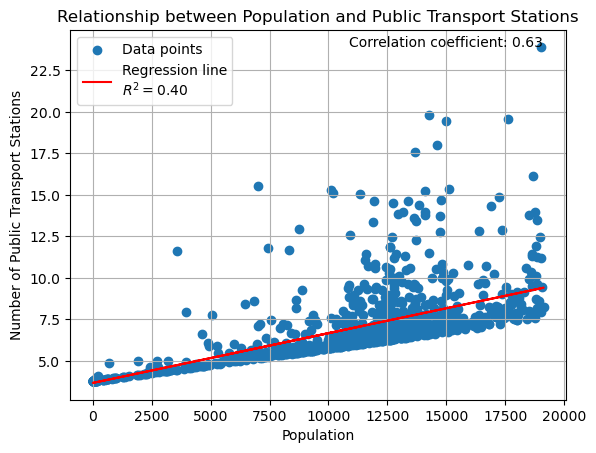

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

X = jakarta_df[['population']]  # Predictor variable
y = jakarta_df['predicted_public_transport_stations']  # Response variable

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict y values for the regression line
y_pred = model.predict(X)


# Scatter plot
plt.scatter(X, y, label='Data points')

# Regression line
plt.plot(X, y_pred, color='red', label=f'Regression line\n$R^2 = {correlation_coefficient**2:.2f}$')

# Correlation coefficient
plt.text(np.mean(X), np.max(y), f'Correlation coefficient: {correlation_coefficient:.2f}', fontsize=10)

plt.title('Relationship between Population and Public Transport Stations')
plt.xlabel('Population')
plt.ylabel('Number of Public Transport Stations')
plt.legend()
plt.grid(True)
plt.show()


In [42]:
from IPython.display import FileLink, display
jakarta_df.to_csv('jakarta_model.csv', index=False)
display(FileLink('jakarta_model.csv'))

/arcgis/jakarta_model.csv